In [25]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import requests # type: ignore
import time
def getPos(z,x,y):
    
    return 0
def getImg(z,x,y):
    #api_url = f"https://trek.nasa.gov/tiles/Moon/EQ/LRO_WAC_Mosaic_Global_303ppd_v02/1.0.0/default/default028mm/{z}/{y}/{x}.jpg"
    api_url = f"https://trek.nasa.gov/tiles/Moon/EQ/LRO_LOLAKaguya_ClrSlope_60N60S_512ppd/1.0.0/default/default028mm/{z}/{y}/{x}.png"
    fileName = f"lro_{z}_{x}_{y}.png"
    headers = {
    "Authorization": "d5vcddhJNugIQFgqKWPRS6gySmpVFDSjoQ5gGche"  # replace 'YOUR_API_KEY' with your actual API key
    }
    response = requests.get(api_url, headers=headers)
    # Check if the request was successful
    if response.status_code == 200:
        # Save the image
        with open(fileName, "wb") as file:
            file.write(response.content)
        print(f"{fileName} saved successfully.")
        return fileName
    else:
        print(f"Failed to retrieve the image. Status code: {response.status_code}")
        print("Response content:", response.text)


def findCraters(img, p1, p2):
    #print(img.shape)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # Apply histogram equalization
    gray = cv2.equalizeHist(gray)
    
    # Apply GaussianBlur to reduce noise and improve edge detection
    gray = cv2.GaussianBlur(gray, (9, 9), 2)
    
    # Apply edge detection using the Canny edge detector
    edges = cv2.Canny(gray, 100, 200)
    #print(gray.shape)
    # Blur using 3 * 3 kernel. 
    gray = cv2.blur(gray, (3, 3)) 
    
    #print(gray_blurred.shape)
    detected_circles = cv2.HoughCircles(gray,  
                    cv2.HOUGH_GRADIENT, 1, 20, param1=p1, 
                param2=p2, minRadius = 25, maxRadius = 135) 
    #print("houghdone!")
    if detected_circles is not None: 
        print("detetced circels!")
        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.uint16(np.around(detected_circles)) 
        for pt in detected_circles[0, :]: 
            a, b, r = pt[0], pt[1], pt[2] 
    
            # Draw the circumference of the circle. 
            cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
            #print(pt)
            # Draw a small circle (of radius 1) to show the center. 
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 

        img_craters = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_craters)
    
def preprocessImage(fileName):
    img = cv2.imread(fileName, cv2.IMREAD_COLOR)
    
    #img = img[:,:,2]
    #kernelSharpen = np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])
    #kernelMaxHat = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
    #img = cv2.GaussianBlur(img,(3,3),0)

    #img = cv2.filter2D(img,-1,kernelSharpen)
    #img_original_display=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    #img  = img[:, :, 2]
    plt.imshow(img)

    return img
    



In [26]:

x = 1
y = 0
z = 5

xMin = 5
xMax = 6
yMin = 2
yMax = 3

#getImg(z,x,y)


filenameList = []

z = 4
#filenameList.append(getImg(z,12,4))
'''for y in range(yMin, yMax+1):
    for x in range(xMin, xMax+1):
        filenameList.append(getImg(z,x,y))
        print(x, " ", y)
        #time.sleep(1)'''
        

'for y in range(yMin, yMax+1):\n    for x in range(xMin, xMax+1):\n        filenameList.append(getImg(z,x,y))\n        print(x, " ", y)\n        #time.sleep(1)'

detetced circels!


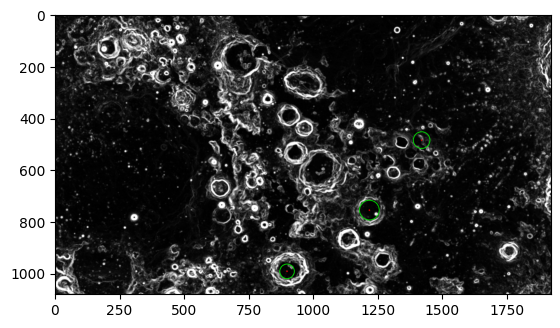

In [27]:
imgP = preprocessImage("test.png")
findCraters(imgP, 170, 35)


In [28]:
print(imgP.shape)

(1080, 1920, 3)


Sources:
https://datahacker.rs/004-how-to-smooth-and-sharpen-an-image-in-opencv/
